# CYPLAN101 Fall 2025 - Lab 7: Mini-Exercise (StoryMap Inputs)

## Learning Objectives:
* Create at least two different data visualizations (histogram, scatterplot) of census variables using seaborn
* Generate a static multi-layer map using matplotlib with proper symbology and export it as a JPEG file
* Produce one interactive web map using the .explore() method in geopandas and save as an HTML file
* Apply visualization best practices including legends, titles, color schemes, and layer ordering



---
## Part I. Visualization with Seaborn
The purpose of this section is to refresh your knowledge of creating plots using matplotlib and seaborn.  To complete this lab exercise you may find it instructive to refer back to previous labs.

### Step 1: Install Dependencies
Install dependencies for your plots into your runtime environment

```
import seaborn as sns
import matplotlib.pyplot as plt
```

### Step 2: Create a Histogram
Visualize the distribution of Median Household Income across Berkeley Census Tracts.  Export the result as a JPEG using the template code below.

```
plt.savefig('YOUR_PLOT_NAME.jpeg')
```

<br>


> **Hint:** To do this, you will need to either export your tabular data from Lab #6 (e.g., as a csv) or you will need to use the code cell below to query the API once more.  This will require setup which you can use the code cell below to complete.


### Step 3: Create a scatterplot
Create a scatterplot to examine the relationship between population and median household income. Export the result as a JPEG once more.

> Bonus: Calculate correlation.

In [1]:
# Use this code cell to import your dependencies
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import geopandas as gpd
from census import Census
from us import states
import folium
import mapclassify

# Load Census API key from the text file
with open("censusAPIKey.txt", "r") as file:
    censusAPIKey = file.read().strip()

census_data = Census(censusAPIKey)

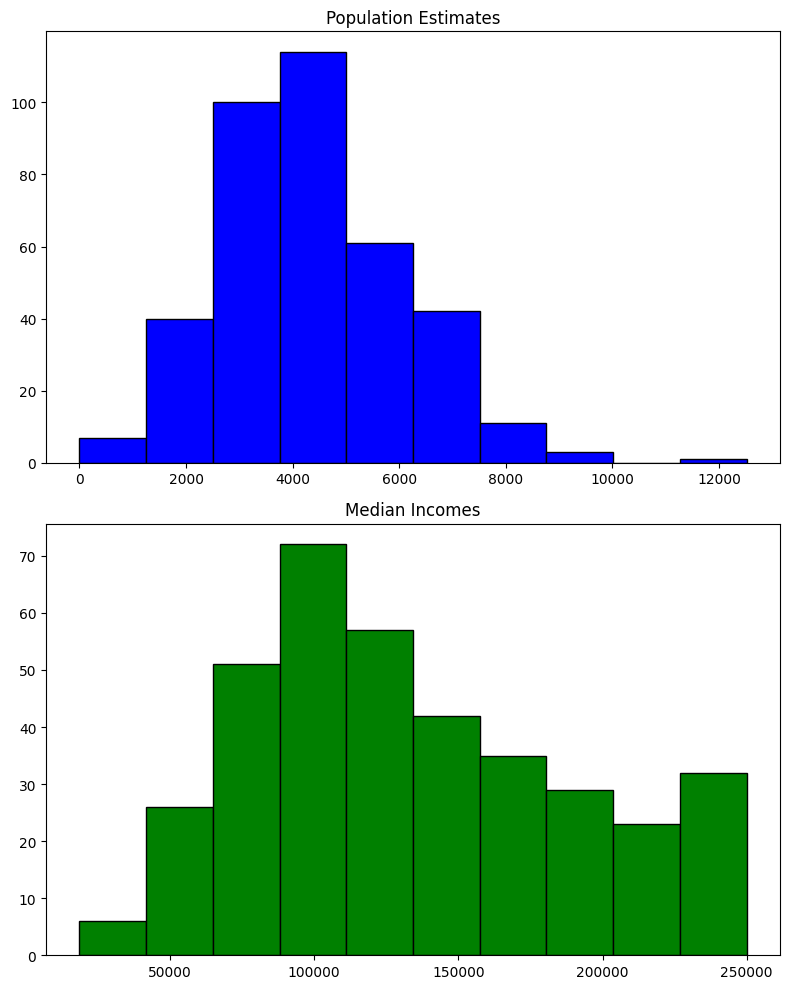

In [2]:
POPULATION_FIELD = 'B01003_001E'
MEDIAN_INCOME_FIELD = 'B19013_001E'
    
# Use this code cell to create your histogram
gdf = gpd.read_file('data/alamedaCensusGdf.gpkg')

fig, ax = plt.subplots(2, figsize=(8, 10), tight_layout=True)

ax[0].hist(gdf[POPULATION_FIELD], edgecolor='black', color='blue')
ax[0].set_title('Population Estimates')

ax[1].hist(gdf[gdf[MEDIAN_INCOME_FIELD] > 0][MEDIAN_INCOME_FIELD], edgecolor='black', color='green')
ax[1].set_title('Median Incomes')

plt.show()

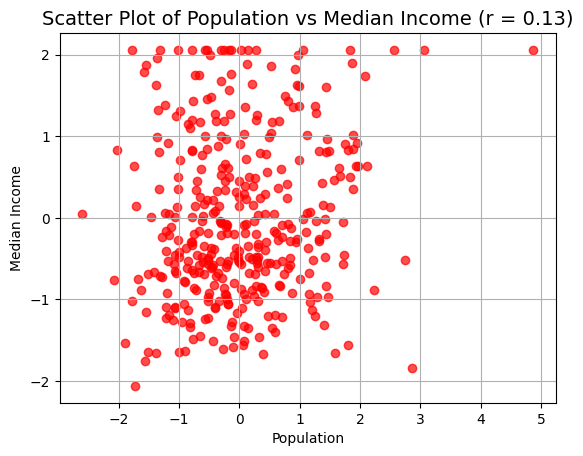

In [3]:
# Use this code cell to create your scatterplot
mask = gdf[MEDIAN_INCOME_FIELD] > 0 # to find income levels that ARENT 0
df = gdf[mask]

def normalizer(s):
    mu = s.mean()
    sigma = s.std()
    return (s - mu) / sigma


x = normalizer(df[POPULATION_FIELD])
y = normalizer(df[MEDIAN_INCOME_FIELD])

r_coeff = np.corrcoef(x, y)[0,1]

plt.figure()
# Scatter plot
plt.scatter(x, y, color='red', alpha=0.7)
plt.title(f'Scatter Plot of Population vs Median Income (r = {r_coeff:.2f})', fontsize=14)
plt.xlabel('Population')
plt.ylabel('Median Income')
plt.grid()
plt.show()

---

## Part II. Interactive Mapping with GeoPandas
There are numerous ways in which you can create data visualizations for inclusion in reports or, in this case, StoryMaps.  Here you will learn to export your maps as JPEGs for upload to the ArcGIS Online StorMapping platform.

<br>

### Step 1: Re-create and Export Your Multi-layer Map
Recall that in the final step of Lab #6 you were asked to create a three-layer map including (1)the jurisdictional boundary of the city of Berkeley, (2) a choropleth map of the census tracts within the city of Berkeley, and (3) the point locations you identified for Assignment #2.  

Reproduce that plot in the code cell below and export it as a high quality JPEG using the template code below:

```
plt.savefig('MAP_NAME_HERE.jpeg')
```


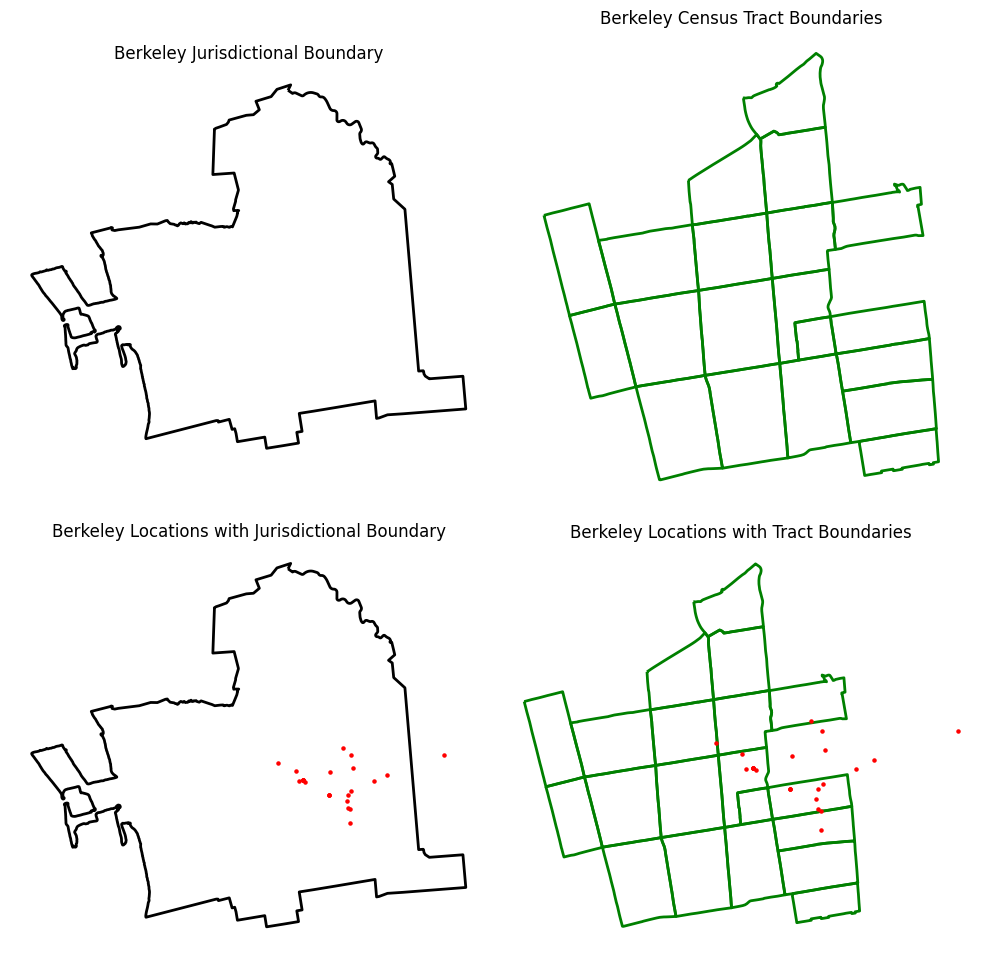

In [ ]:
berkeley_census_tract = gpd.read_file("data/berkeley_census_tracts_gdf.gpkg")
berkeley_boundary = gpd.read_file("data/berkeley_land_boundary_2024.geojson")
berkeley_places_gdf = gpd.read_file("data/berkeley_places_gdf.gpkg")

fig, ax = plt.subplots(2,2, figsize=(10,10))
# Jurisdictional boundary subplot
berkeley_boundary.plot(ax=ax[0, 0], facecolor='none', edgecolor='black', linewidth=2)
ax[0,0].set_title('Berkeley Jurisdictional Boundary')
ax[0,0].axis('off')

# Berkeley Census Tract Boundaries
berkeley_census_tract.plot(ax=ax[0, 1], facecolor='none', edgecolor='green', linewidth=2)
ax[0,1].set_title('Berkeley Census Tract Boundaries')
ax[0,1].axis('off')

# Berkeley Locations with Jurisdicitonal Boundary Plot
berkeley_boundary.plot(ax=ax[1, 0], facecolor='none', edgecolor='black', linewidth=2)
berkeley_places_gdf.plot(ax=ax[1, 0], color='red', markersize=5)
ax[1,0].set_title('Berkeley Locations with Jurisdictional Boundary')
ax[1,0].axis('off')

# Berkeley locations with Tract Boundaries
berkeley_census_tract.plot(ax=ax[1, 1], facecolor='none', edgecolor='green', linewidth=2)
berkeley_places_gdf.plot(ax=ax[1, 1], color='red', markersize=5)
ax[1,1].set_title('Berkeley Locations with Tract Boundaries')
ax[1,1].axis('off')

plt.tight_layout()
plt.savefig("figures/berkeley_analysis_plots.jpeg")
plt.show()

## Part III. Interactive Mapping with Geopandas
The `.explore()` method in GeoPandas creates interactive Folium maps that can be saved as html files.  You can export these as html files which can be embedded if hosted online.

Use the code cell below to create an interactive map using `.explore()``

> **Hint:** You may need to check the documentation for the .explore method in order to propertly configure your map.  You can also adapt the following template code:
```
# Base layer
m = gdf.explore(
    column='column_name',
    cmap='YlGnBu',
    legend=True,
    tooltip=['col1', 'col2'],
    name='Layer Name'
)

# Add another layer
gdf2.explore(
    m=m,
    color='red',
    name='Layer 2'
)

# Add layer control to toggle layers on/off
import folium
folium.LayerControl().add_to(m)
m
```


In [ ]:
# Use this code cell to produce an interactive version of your map.
# Be mindful of dependencies.

# Base layer
m = berkeley_census_tract.explore(
    name='Census Tracts',
    column = MEDIAN_INCOME_FIELD,
    cmap='YlGn',
    legend=True,
    tooltip= [POPULATION_FIELD, MEDIAN_INCOME_FIELD],
    style_kwds={'fillOpacity': 0.7, 'color': 'black', 'weight': 1}
)

# Add another layer for Berkeley boundary
berkeley_boundary.explore(
    m=m,
    name='Berkeley Boundary',
    style_kwds={'fillOpacity': 0, 'color': 'blue', 'weight': 3}
)

folium.LayerControl().add_to(m)
m.save("interactive_maps/Lab7_map.html")